In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Unziping Data
!7z e "../input/kkbox-music-recommendation-challenge/members.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/songs.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/test.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/train.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../input/kkbox-music-recommendation-challeng                                                      1 file, 1349856 bytes (1319 KiB)

Extracting archive: ../input/kkbox-music-recommendation-challenge/members.csv.7z
--
Path = ../input/kkbox-music-recommendation-challenge/members.csv.7z
Type = 7z
Physical Size = 1349856
Headers Size = 130
Method = LZMA2:3m
Solid = -
Blocks = 1

    Everything is Ok

Size:       2503827
Compressed: 1349856

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../input/kkbox-music-recommendation-challeng                                           

In [3]:
# Load data
df = pd.read_csv('./train.csv')
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [4]:
# Sampling Only Half the Data
df = df.sample(frac=0.5)

In [5]:
# Load and join songs data
songs = pd.read_csv('./songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join members data
members = pd.read_csv('./members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 534.7+ MB


In [7]:
df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,3.688709e+06,3.688658e+06,3.688638e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,5.033387e-01,2.451198e+05,1.861478e+01,7.510800e+00,1.754628e+01,6.794087e+00,2.012808e+07,2.017157e+07
std,4.999889e-01,6.700585e+04,2.118258e+01,6.641669e+00,2.161695e+01,2.275971e+00,3.017258e+04,3.875644e+03
min,0.000000e+00,1.393000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07
50%,1.000000e+00,2.418120e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07
75%,1.000000e+00,2.721698e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07
max,1.000000e+00,1.080006e+07,5.900000e+01,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07


In [8]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,27524,1590506,0.431182
gender,object,2,1480258,0.401294
composer,object,59474,838794,0.227395
source_screen_name,object,20,207458,0.056241
genre_ids,object,528,59492,0.016128
source_system_tab,object,8,12258,0.003323
source_type,object,12,10725,0.002908
language,float64,10,71,0.000019
song_length,float64,49725,51,0.000014
artist_name,object,32303,51,0.000014


**Visualizing Null Values**

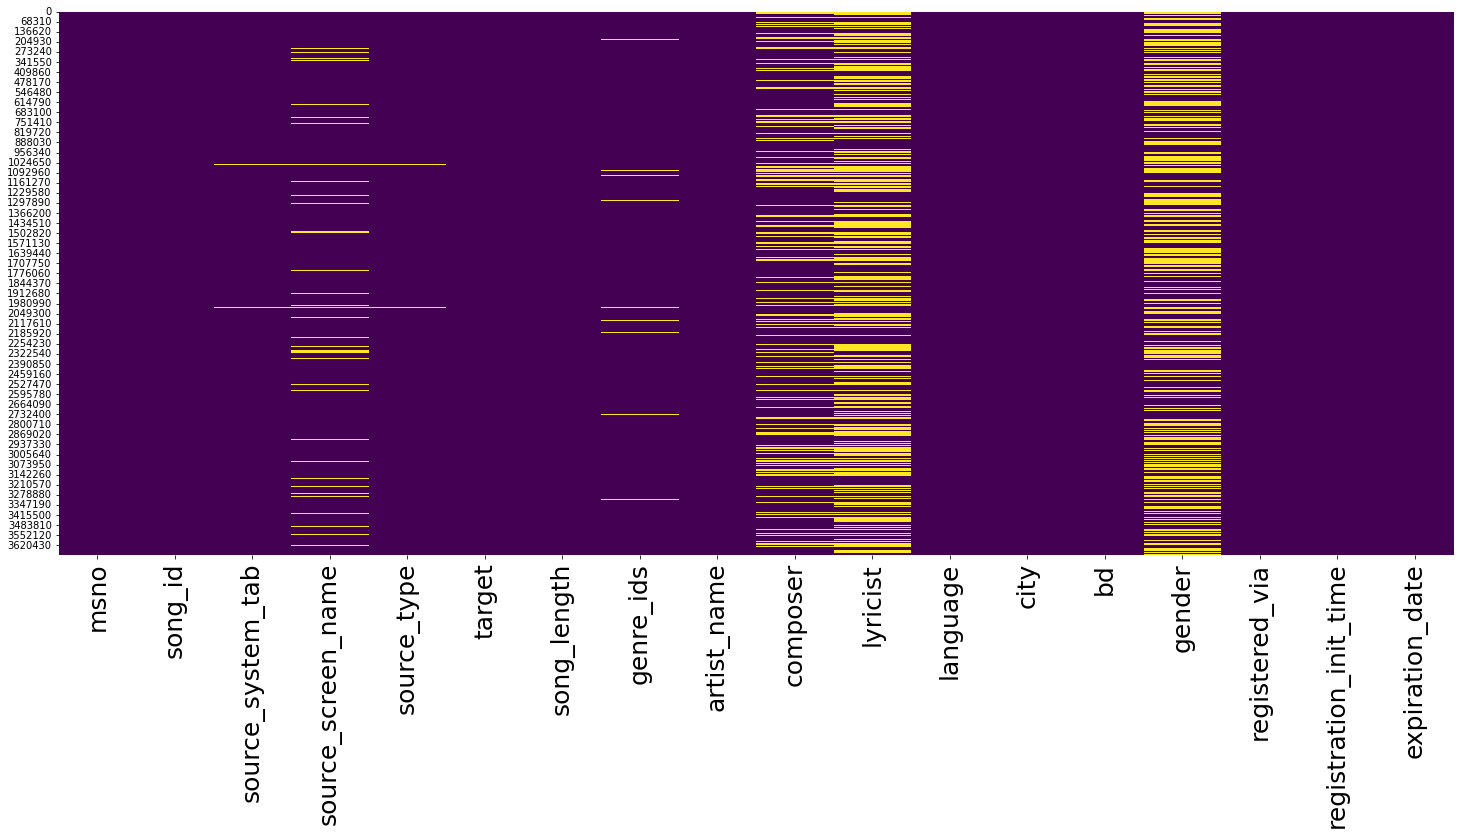

In [9]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.tick_params(axis='x', labelsize=25)

# **Filling Null Values**

In [10]:
# Strings with 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
# Numerics with mean    
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [11]:
df.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

# **Parsing Dates and Extracting new Date Features**

In [12]:
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


df['expiration_date'] = pd.to_datetime(df['expiration_date'],  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [13]:
# Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category') 

In [14]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,CUcg+88Ooerma7VG4ddwyiEINupMiCAqcD4wxwdxBeE=,5wbmL28bg5jQSHN84xtbQuaYHm2y9xEtvGmFBfvsUuY=,my library,Local playlist more,local-library,1,227578.0,465,羅志祥 (Show Lo),Mackichan/Blair,...,female,9,2016-09-28,2018-03-16,2016,9,28,2018,3,16
1,BHOLRxgzEFsE1KtpOUh8y2HP7kzCTeCZx6KiGEl2i1s=,rpwkvozddJOROu+jgmLdelvsPg9mjTDyo+/zptz/k7I=,discover,Album more,album,0,172013.0,958,Celtic Woman,Traditional,...,unknown,7,2016-03-12,2017-09-17,2016,3,12,2017,9,17
2,5VhXtZnvQNsGT8N8ImLn6mpPVlz2rWFjFtcTtOeiHTw=,T0w5CQd2yvcQ7PPEuyJ80aytwkE4opA4GpnDqwDCRXc=,discover,Online playlist more,online-playlist,0,259866.0,465,竇靖童 (Leah Dou),Heather Porcaro / Leah Dou,...,unknown,7,2010-09-18,2017-07-08,2010,9,18,2017,7,8
3,PJKQb8e0zTuM+GngOxViOJbBna5e8UzXlE46debokHI=,Gyv1uF4nLvqvJbo2JqnWy7i77iZGJY4sOqV+f13PS+k=,my library,Local playlist more,local-playlist,1,202199.0,921|465,莫文蔚 (Karen Mok),日向大介,...,unknown,7,2010-12-01,2017-09-11,2010,12,1,2017,9,11
4,jQVleqQqpBI8aLie94SxBp42XQmokabp/f9gq1E7y2U=,yPA+sQt5tJ3NgR6/L9BefmNpA2152zQQ+/Kvtt3iSUs=,discover,Online playlist more,online-playlist,0,286876.0,465,蔡依林 (Jolin Tsai),unknown,...,unknown,9,2014-12-28,2017-10-06,2014,12,28,2017,10,6


# **Encoding and Categorizating Columns**

In [15]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   msno                          int16  
 1   song_id                       int32  
 2   source_system_tab             int8   
 3   source_screen_name            int8   
 4   source_type                   int8   
 5   target                        int64  
 6   song_length                   float64
 7   genre_ids                     int16  
 8   artist_name                   int16  
 9   composer                      int32  
 10  lyricist                      int16  
 11  language                      float64
 12  city                          int64  
 13  bd                            int64  
 14  gender                        int8   
 15  registered_via                int64  
 16  registration_init_time        int16  
 17  expiration_date               int16  
 18  registration_init_time

In [17]:
df.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,...,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,1.503205e+04,1.294126e+05,2.441221e+00,9.083370e+00,4.763982e+00,5.033387e-01,2.451198e+05,3.046401e+02,2.180982e+04,4.181590e+04,...,1.114306e+00,6.794087e+00,2.543849e+03,9.472750e+02,2.012738e+03,6.831755e+00,1.581578e+01,2.017072e+03,8.340141e+00,1.561604e+01
std,8.670308e+03,7.485709e+04,1.889740e+00,4.594281e+00,2.468984e+00,4.999889e-01,6.700538e+04,9.036193e+01,9.999186e+03,1.646545e+04,...,8.217160e-01,2.275971e+00,9.642477e+02,1.120562e+02,3.018834e+00,3.700135e+00,8.768908e+00,3.988199e-01,2.512137e+00,9.107219e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.393000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03,1.000000e+00,1.000000e+00
25%,7.517000e+03,6.452100e+04,0.000000e+00,8.000000e+00,3.000000e+00,0.000000e+00,2.147260e+05,3.120000e+02,1.400500e+04,2.996000e+04,...,0.000000e+00,4.000000e+00,1.946000e+03,9.360000e+02,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00,8.000000e+00
50%,1.511500e+04,1.288560e+05,3.000000e+00,8.000000e+00,4.000000e+00,1.000000e+00,2.418120e+05,3.180000e+02,2.713500e+04,5.024800e+04,...,1.000000e+00,7.000000e+00,2.673000e+03,9.510000e+02,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00,1.500000e+01
75%,2.259100e+04,1.932250e+05,3.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,2.721690e+05,3.180000e+02,2.949300e+04,5.307500e+04,...,2.000000e+00,9.000000e+00,3.403000e+03,9.610000e+02,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01,2.300000e+01
max,2.998000e+04,2.596070e+05,8.000000e+00,2.000000e+01,1.200000e+01,1.000000e+00,1.080006e+07,5.280000e+02,3.230300e+04,5.947300e+04,...,2.000000e+00,1.300000e+01,3.806000e+03,1.365000e+03,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01,3.100000e+01


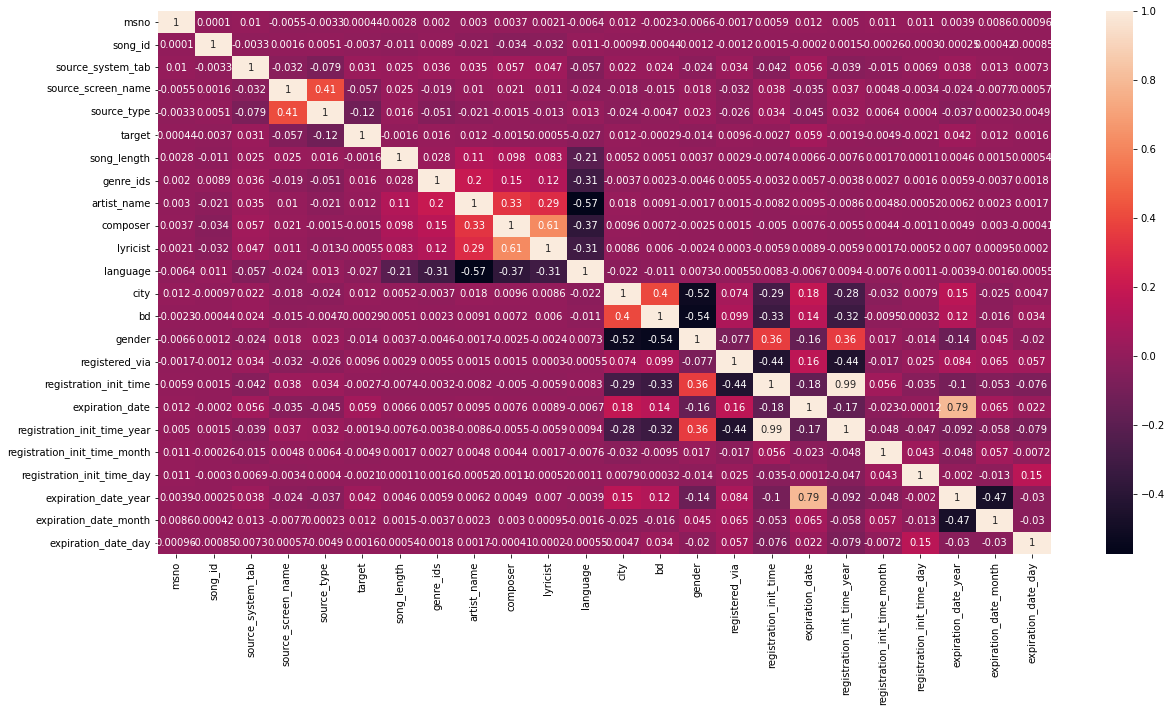

In [18]:
# Сorrelation matrix
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Train and Test split**

In [19]:
target = df.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split( df , target, test_size = 0.2)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(2950967, 23)
(2950967,)
(737742, 23)
(737742,)


# **Feature Selection with Random Forest**

In [21]:
# Model with the best estimator
RF = RandomForestClassifier()
RF.fit(train_data, train_labels)

RF_TrainScore = RF.score(train_data, train_labels)
RF_TrainScore

0.999995594664393

In [23]:
RF_TestScore = RF.score(test_data, test_labels)
RF_TestScore

0.7165350488382117

In [24]:
y_pred_rf =RF.predict(test_data)

<AxesSubplot:>

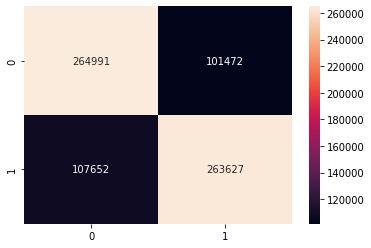

In [25]:
#Confusion matrix
import seaborn as sns 
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(test_labels, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g')

In [26]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72    366463
           1       0.72      0.71      0.72    371279

    accuracy                           0.72    737742
   macro avg       0.72      0.72      0.72    737742
weighted avg       0.72      0.72      0.72    737742



**Feature Selection**

In [27]:
df_plot = pd.DataFrame({'features': df.columns,
                        'importances': RF.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

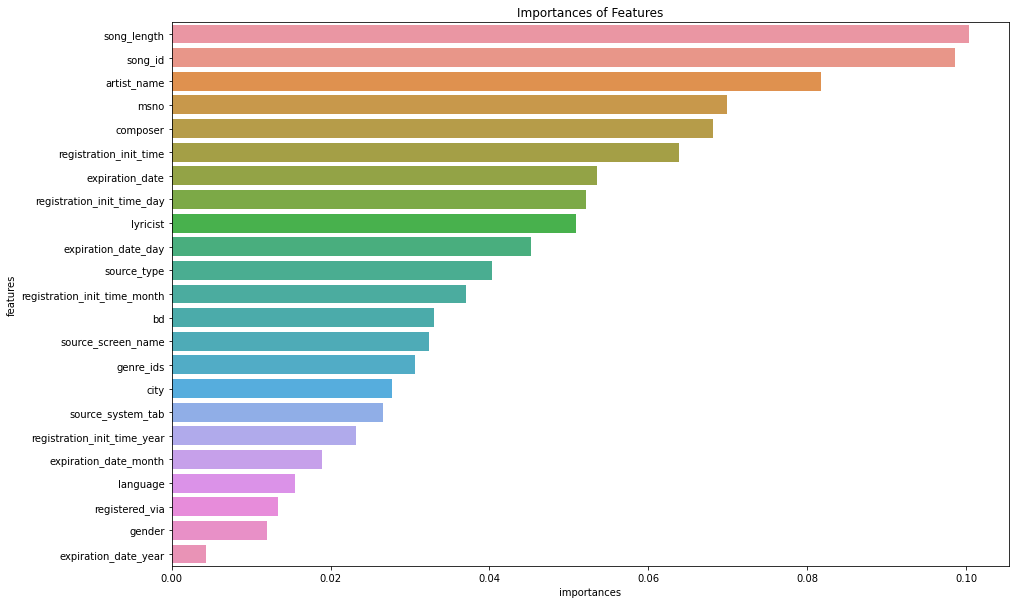

In [28]:
plt.figure(figsize=[15,10])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features')
plt.show()

In [29]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [30]:
# Selected columns
print(df.shape)
df.columns

(3688709, 11)


Index(['msno', 'song_id', 'source_type', 'song_length', 'artist_name',
       'composer', 'lyricist', 'registration_init_time', 'expiration_date',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

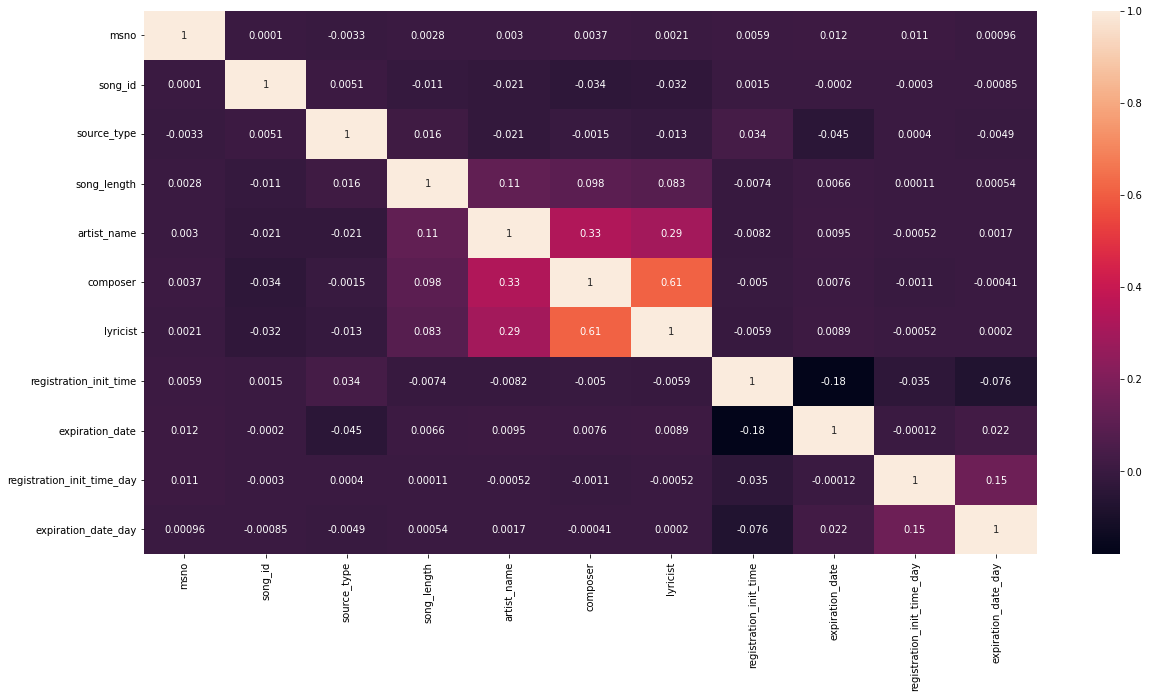

In [31]:
# Сorrelation matrix
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [35]:
from catboost import CatBoostClassifier

# **CatBoost Classifier**

In [36]:
CatBoost = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=300)
CatBoost.fit(train_data, train_labels)


CatBoost_TrainScore = CatBoost.score(train_data, train_labels)


0:	learn: 0.6847147	total: 1.36s	remaining: 6m 47s
1:	learn: 0.6783698	total: 2.62s	remaining: 6m 30s
2:	learn: 0.6729622	total: 3.88s	remaining: 6m 24s
3:	learn: 0.6688941	total: 5.15s	remaining: 6m 21s
4:	learn: 0.6651922	total: 6.43s	remaining: 6m 19s
5:	learn: 0.6623085	total: 8.12s	remaining: 6m 37s
6:	learn: 0.6596624	total: 9.73s	remaining: 6m 47s
7:	learn: 0.6577328	total: 11s	remaining: 6m 41s
8:	learn: 0.6561864	total: 12.2s	remaining: 6m 35s
9:	learn: 0.6546390	total: 13.5s	remaining: 6m 31s
10:	learn: 0.6534850	total: 14.8s	remaining: 6m 27s
11:	learn: 0.6523622	total: 16s	remaining: 6m 24s
12:	learn: 0.6514005	total: 17.3s	remaining: 6m 21s
13:	learn: 0.6505355	total: 18.6s	remaining: 6m 19s
14:	learn: 0.6497017	total: 19.9s	remaining: 6m 17s
15:	learn: 0.6490489	total: 21.1s	remaining: 6m 15s
16:	learn: 0.6485516	total: 22.4s	remaining: 6m 12s
17:	learn: 0.6479891	total: 23.7s	remaining: 6m 10s
18:	learn: 0.6474981	total: 24.9s	remaining: 6m 8s
19:	learn: 0.6470989	total:

In [37]:
CatBoost_TrainScore

0.6689061585575169

In [38]:
CatBoost_TestScore = CatBoost.score(test_data, test_labels)
CatBoost_TestScore

0.6656595395138137

In [39]:
# Predicting
y_pred_catboost = CatBoost.predict(test_data)

In [41]:
cm_catboost = confusion_matrix(test_labels, y_pred_catboost)

In [42]:
print(classification_report(test_labels, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66    366463
           1       0.66      0.69      0.68    371279

    accuracy                           0.67    737742
   macro avg       0.67      0.67      0.67    737742
weighted avg       0.67      0.67      0.67    737742

